# Proyek Analisis Data: [Bike_sharing_project]
- **Nama:** [Wick Indiyarto]
- **Email:** [B44044F@devacademy.id]
- **ID Dicoding:** [B44044F]

## Menentukan Pertanyaan Bisnis


1. Bagaimana gambaran Trend penyewaan sepeda dalam 2 tahun?
2. Bagaimana pola bike sharing saat weekday dan weekend perbulannya ?
3. Bagaimana pola penggunaan Bike dari user casual maupun registered setiap harinya?
4. Bagaimana pola penggunaan Bike sharing/rent berdasarkan musim dan cuaca ?

Tambahan anaysis RFM untuk menentukan hari terbaik dan promosi apa yang tepat untuk meningkatkan penggunaan bike sharing/rent

## Import Semua Packages/Library yang Digunakan

In [2]:
# Import Semua Packages/Library yang Digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from datetime import datetime
pd.show_versions()


INSTALLED VERSIONS
------------------
commit                : 0691c5cf90477d3503834d983f69350f250a6ff7
python                : 3.13.1
python-bits           : 64
OS                    : Windows
OS-release            : 11
Version               : 10.0.22631
machine               : AMD64
processor             : AMD64 Family 25 Model 116 Stepping 1, AuthenticAMD
byteorder             : little
LC_ALL                : None
LANG                  : None
LOCALE                : English_Indonesia.1252

pandas                : 2.2.3
numpy                 : 2.1.3
pytz                  : 2024.2
dateutil              : 2.9.0.post0
pip                   : 24.3.1
Cython                : None
sphinx                : None
IPython               : 8.30.0
adbc-driver-postgresql: None
adbc-driver-sqlite    : None
bs4                   : 4.12.3
blosc                 : None
bottleneck            : None
dataframe-api-compat  : None
fastparquet           : None
fsspec                : None
html5lib             

## Data Wrangling

### Gathering Data

In [3]:
# Memuat tabel day
day = pd.read_csv('dashboard/day.csv')
day


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**

- Berdasarkan tabel Day di atas dapat dilihat bahwa dataset memiliki jumlah baris sebanyak 731 dan 16 kolom.

### Assessing Data

**Dataset characteristics**

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


In [4]:
# checking tipe data dari tiap kolom day
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print(day.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


### **Cek data duplikasi**

In [6]:
#cek duplikasi
print('count of duplication: ', day.duplicated().sum())
day.describe()

count of duplication:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada dupikasi di dataframe day

### **Cek missing value**

In [7]:
# mengecek keberadaan missing value di dataset day
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cleaning Data

**Rename column**

In [8]:
day.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'weekday':'day', 'weathersit':'weather',
                    'temp':'temperature', 'atemp':'temperature_feel', 'hum':'humidity', 'casual':'casual_user',
                    'registered':'registered_user', 'cnt':'total_user'}, inplace=True)

In [9]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instant           731 non-null    int64  
 1   date              731 non-null    object 
 2   season            731 non-null    int64  
 3   year              731 non-null    int64  
 4   month             731 non-null    int64  
 5   holiday           731 non-null    int64  
 6   day               731 non-null    int64  
 7   workingday        731 non-null    int64  
 8   weather           731 non-null    int64  
 9   temperature       731 non-null    float64
 10  temperature_feel  731 non-null    float64
 11  humidity          731 non-null    float64
 12  windspeed         731 non-null    float64
 13  casual_user       731 non-null    int64  
 14  registered_user   731 non-null    int64  
 15  total_user        731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory u

**konversi data**

In [10]:
#konversi season
def konversi_season(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'

day['season'] = day['season'].apply(konversi_season)
day.tail()

,instant,date,season,year,month,holiday,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
726,727,2012-12-27,spring,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,spring,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,spring,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,spring,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,spring,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [11]:
#konversi Year
def konversi_year(x):
    if x == 0:
        return 2011
    else:
        return 2012

day['year'] = day['year'].apply(konversi_year)
day.tail()

,instant,date,season,year,month,holiday,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
726,727,2012-12-27,spring,2012,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,spring,2012,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,spring,2012,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,spring,2012,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,spring,2012,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [12]:
konversi_day = {0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4:'friday', 5:'saturday', 6:'sunday'}

day['day'] = day['day'].map(konversi_day)
day.tail(5)

,instant,date,season,year,month,holiday,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
726,727,2012-12-27,spring,2012,12,0,friday,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,spring,2012,12,0,saturday,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,spring,2012,12,0,sunday,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,spring,2012,12,0,monday,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,spring,2012,12,0,tuesday,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [13]:
def konversi_workingday(x):
    if x == 0:
        return 'weekend/holiday'
    else:
        return 'working day'

day['workingday'] = day['workingday'].apply(konversi_workingday)
day.tail()

,instant,date,season,year,month,holiday,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
726,727,2012-12-27,spring,2012,12,0,friday,working day,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,spring,2012,12,0,saturday,working day,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,spring,2012,12,0,sunday,weekend/holiday,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,spring,2012,12,0,monday,weekend/holiday,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,spring,2012,12,0,tuesday,working day,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [14]:
def konversi_weather(x):
    if x == 1:
        return 'clear'
    elif x == 2:
        return 'mist'
    elif x == 3:
        return 'snow'
    else:
        return 'heavy rain'

day['weather'] = day['weather'].apply(konversi_weather)
day.tail()

,instant,date,season,year,month,holiday,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
726,727,2012-12-27,spring,2012,12,0,friday,working day,mist,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,spring,2012,12,0,saturday,working day,mist,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,spring,2012,12,0,sunday,weekend/holiday,mist,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,spring,2012,12,0,monday,weekend/holiday,clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,spring,2012,12,0,tuesday,working day,mist,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [15]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instant           731 non-null    int64  
 1   date              731 non-null    object 
 2   season            731 non-null    object 
 3   year              731 non-null    int64  
 4   month             731 non-null    int64  
 5   holiday           731 non-null    int64  
 6   day               731 non-null    object 
 7   workingday        731 non-null    object 
 8   weather           731 non-null    object 
 9   temperature       731 non-null    float64
 10  temperature_feel  731 non-null    float64
 11  humidity          731 non-null    float64
 12  windspeed         731 non-null    float64
 13  casual_user       731 non-null    int64  
 14  registered_user   731 non-null    int64  
 15  total_user        731 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory us

In [17]:
# Mengubah tipe data ke datetime dan categorical
day['season'] = day.season.astype('category')
day['year'] = day.year.astype('category')
day['month'] = day.month.astype('category')
day['workingday'] = day.workingday.astype('category')
day['day'] = day.day.astype('category')
day['date'] = pd.to_datetime(day.date)
day['weather'] = day.weather.astype('category')
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           731 non-null    int64         
 1   date              731 non-null    datetime64[ns]
 2   season            731 non-null    category      
 3   year              731 non-null    category      
 4   month             731 non-null    category      
 5   holiday           731 non-null    int64         
 6   day               731 non-null    category      
 7   workingday        731 non-null    category      
 8   weather           731 non-null    category      
 9   temperature       731 non-null    float64       
 10  temperature_feel  731 non-null    float64       
 11  humidity          731 non-null    float64       
 12  windspeed         731 non-null    float64       
 13  casual_user       731 non-null    int64         
 14  registered_user   731 non-

## Exploratory Data Analysis (EDA)

In [18]:
day.describe(include="all")

,instant,date,season,year,month,holiday,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
count,731.000000,731,731,731.0,731.0,731.000000,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2.0,12.0,NaN,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,2012.0,1.0,NaN,monday,working day,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366.0,62.0,NaN,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Number of Daily Users**

In [19]:
day.groupby(by="day").agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

C:\Users\wicki\AppData\Local\Temp\ipykernel_23688\1199462856.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day.groupby(by="day").agg({


date casual_user registered_user total_user                     \
          nunique         sum             sum        max   min         mean   
day                                                                           
friday        104       61460          423935       7804   431  4667.259615   
monday        105      140521          303506       8227   605  4228.828571   
saturday      104       78238          409552       8362  1167  4690.288462   
sunday        105      153852          323955       8714   627  4550.542857   
thursday      104       57319          415729       8173   441  4548.538462   
tuesday       105       70784          384719       7525    22  4338.123810   
wednesday     104       57843          411266       7767   683  4510.663462   

                   
              sum  
day                
friday     485395  
monday     444027  
saturday   487790  
sunday     477807  
thursday   473048  
tuesday    455503  
wednesday  469109

**Number of Monthly and Annual Users**

In [20]:
day.groupby(by=["year", "month"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

C:\Users\wicki\AppData\Local\Temp\ipykernel_23688\3299768557.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day.groupby(by=["year", "month"]).agg({


date casual_user registered_user total_user                     \
           nunique         sum             sum        max   min         mean   
year month                                                                     
2011 1          31        3073           35116       1985   431  1231.903226   
     2          28        6242           41973       2927  1005  1721.964286   
     3          31       12826           51219       3239   605  2065.967742   
     4          30       22346           72524       5312   795  3162.333333   
     5          31       31050          104771       5805  2633  4381.322581   
     6          30       30612          112900       5515  3767  4783.733333   
     7          31       36452          104889       6043  3285  4559.387097   
     8          31       28842          107849       5895  1115  4409.387097   
     9          30       26545          100873       5423  1842  4247.266667   
     10         31       25222           98289       5511   627  3984.225806   
     11         30       15594           86573       4486  1495  3405.566667   
     12         31        8448           78875       3940   705  2816.870968   
2012 1          31        8969           87775       4521  1301  3120.774194   
     2          29        8721           94416       5062  1529  3556.448276   
     3          31       31618          133257       8362  3194  5318.548387   
     4          30       38456          135768       7460  1027  5807.466667   
     5          31       44235          151630       8294  2843  6318.225806   
     6          30       43294          159536       8120  4127  6761.000000   
     7          31       41705          161902       8173  4459  6567.967742   
     8          31       43197          171306       7865  4549  6919.451613   
     9          30       43778          174795       8714  4073  7285.766667   
     10         31       34538          164303       8156    22  6414.225806   
     11         30       21009          131655       6852  2277  5088.800000   
     12         31       13245          110468       6606   441  3990.741935   

                    
               sum  
year month          
2011 1       38189  
     2       48215  
     3       64045  
     4       94870  
     5      135821  
     6      143512  
     7      141341  
     8      136691  
     9      127418  
     10     123511  
     11     102167  
     12      87323  
2012 1       96744  
     2      103137  
     3      164875  
     4      174224  
     5      195865  
     6      202830  
     7      203607  
     8      214503  
     9      218573  
     10     198841  
     11     152664  
     12     123713

**Correlation Heatmap**

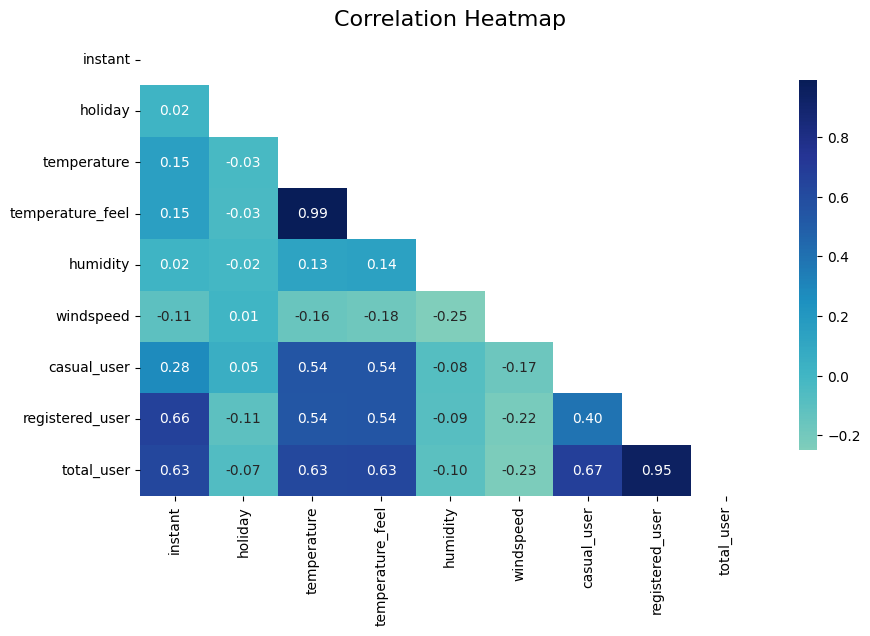

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

correlation_matrix =day.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="YlGnBu",  # color palette
    center=0,
    fmt=".2f",
    annot_kws={"fontsize": 10},  # Adjust font size for annotations
    cbar_kws={"shrink": 0.8}  # Adjust colorbar size
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


**insight**

1. Variabel 'count' berkorelasi kuat dengan casual dan register karena memang komponen pembentuknya dari 2 variabel tersebut
2. Variabel humidity memiliki korelasi negatif dengan variable 'count', menunjukkan bahwa bila kelembaban tinggi menyebabkan count(jumlah) pengguna sepeda rendah

In [22]:
sum_casual_user = day.groupby("day").casual_user.sum().sort_values(ascending=False).reset_index()
sum_casual_user

C:\Users\wicki\AppData\Local\Temp\ipykernel_23688\2428399208.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_casual_user = day.groupby("day").casual_user.sum().sort_values(ascending=False).reset_index()


,day,casual_user
0,sunday,153852
1,monday,140521
2,saturday,78238
3,tuesday,70784
4,friday,61460
5,wednesday,57843
6,thursday,57319


In [23]:
sum_registered_user = day.groupby("day").registered_user.sum().sort_values(ascending=False).reset_index()
sum_registered_user


C:\Users\wicki\AppData\Local\Temp\ipykernel_23688\597585832.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_registered_user = day.groupby("day").registered_user.sum().sort_values(ascending=False).reset_index()


,day,registered_user
0,friday,423935
1,thursday,415729
2,wednesday,411266
3,saturday,409552
4,tuesday,384719
5,sunday,323955
6,monday,303506


In [24]:
daily_user = pd.merge(
    left=sum_casual_user,
    right=sum_registered_user,
    how="left",
    left_on="day",
    right_on="day"
)
daily_user

,day,casual_user,registered_user
0,sunday,153852,323955
1,monday,140521,303506
2,saturday,78238,409552
3,tuesday,70784,384719
4,friday,61460,423935
5,wednesday,57843,411266
6,thursday,57319,415729


In [25]:
daily_user_type = daily_user.melt(id_vars='day', var_name='user_type', value_name='user_count')
daily_user_type


,day,user_type,user_count
0,sunday,casual_user,153852
1,monday,casual_user,140521
2,saturday,casual_user,78238
3,tuesday,casual_user,70784
4,friday,casual_user,61460
5,wednesday,casual_user,57843
6,thursday,casual_user,57319
7,sunday,registered_user,323955
8,monday,registered_user,303506
9,saturday,registered_user,409552


In [26]:
byweather = day.groupby("weather").total_user.sum().sort_values(ascending=False).reset_index()
byweather

C:\Users\wicki\AppData\Local\Temp\ipykernel_23688\1708111715.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  byweather = day.groupby("weather").total_user.sum().sort_values(ascending=False).reset_index()


,weather,total_user
0,clear,2257952
1,mist,996858
2,snow,37869


In [27]:
byseason = day.groupby("season").total_user.sum().sort_values(ascending=False).reset_index()
byseason

C:\Users\wicki\AppData\Local\Temp\ipykernel_23688\4258882321.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  byseason = day.groupby("season").total_user.sum().sort_values(ascending=False).reset_index()


,season,total_user
0,fall,1061129
1,summer,918589
2,winter,841613
3,spring,471348


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana gambaran Trend penyewaan sepeda dalam 2 tahun?

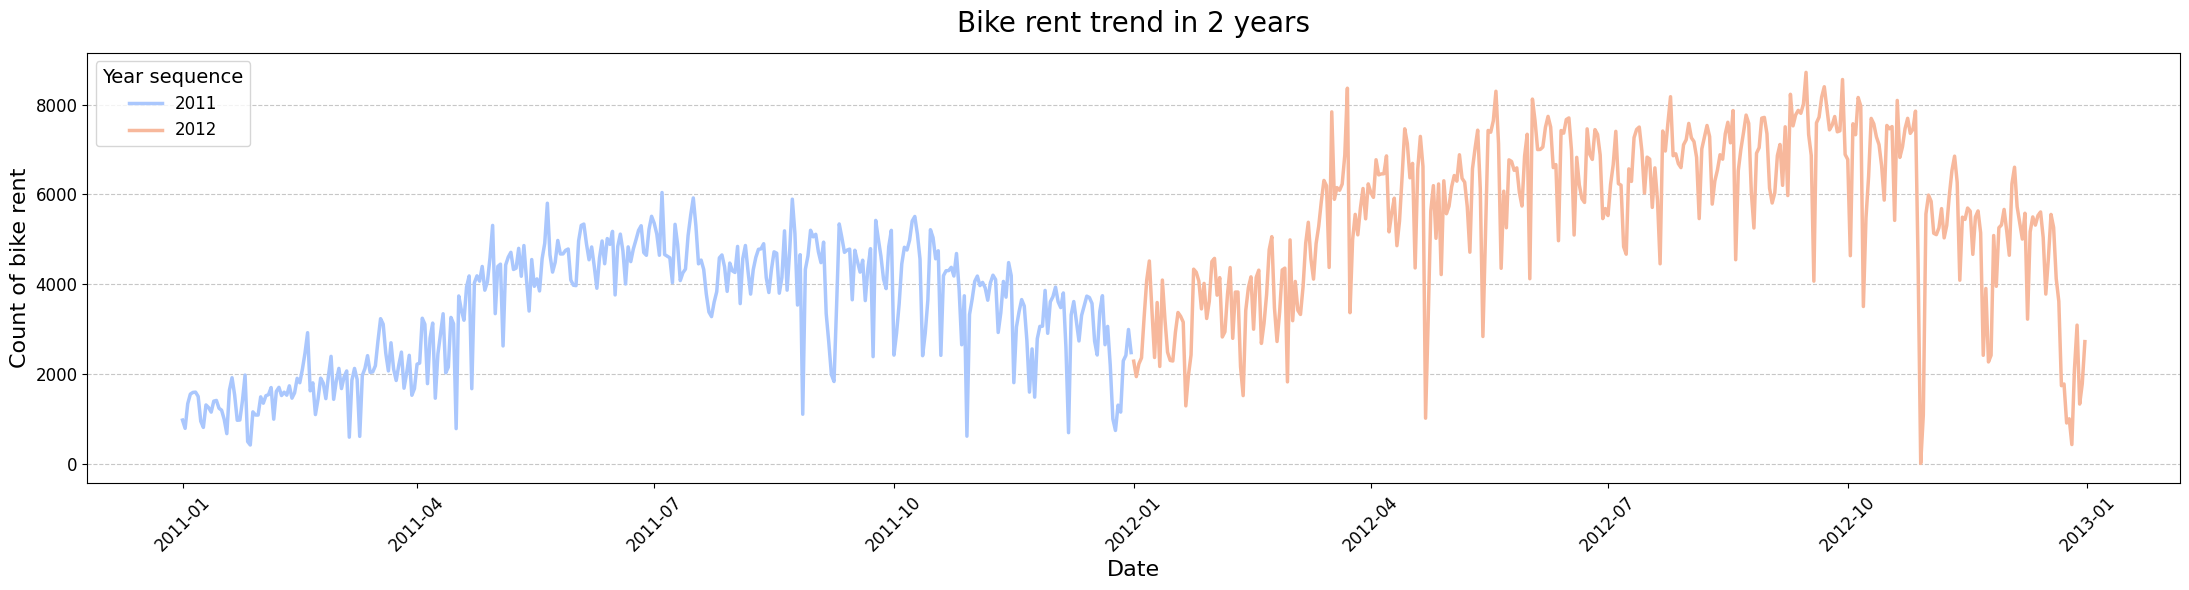

In [29]:
# 1. Trend penyewaan sepeda dalam 2 tahun
plt.figure(figsize=(22, 6))
sns.lineplot(
    data=day,
    x='date',
    y='total_user',
    hue='year',
    palette='coolwarm',
    linewidth=2.5
)

# Menambahkan elemen
plt.title('Bike rent trend in 2 years', fontsize=20, pad=15)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Count of bike rent', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Menambahkan grid
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menambahkan legend
plt.legend(title='Year sequence', loc='upper left', fontsize=12, title_fontsize=14)

# Menampilkan chart
plt.tight_layout()
plt.show()

tren penggunaan bike sharing tahun 2012 naik dibanding 2011

### Pertanyaan 2:

Bagaimana pola bike sharing saat weekday dan weekend  perbulannya ?

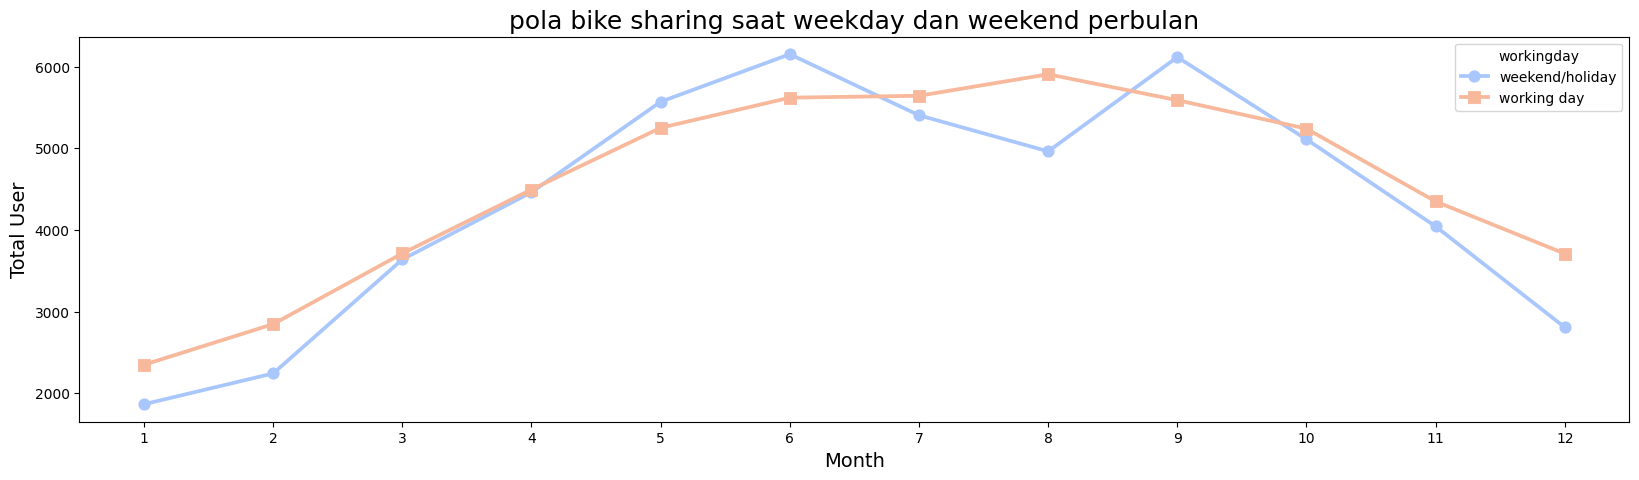

In [30]:
#Bike Sharing Productivity by Month
fig, ax = plt.subplots(figsize=(20, 5))
sns.pointplot(data=day, x='month', y='total_user', hue='workingday', errorbar=None, ax=ax, palette="coolwarm", markers=["o", "s"])

# Setting the title and labels
ax.set_title('pola bike sharing saat weekday dan weekend perbulan', fontsize=18)
ax.set_ylabel('Total User', fontsize=14)
ax.set_xlabel('Month', fontsize=14)

# Display the plot
plt.show()

**insight**

dari chart tsb penggunaan bike sharing dimulai dari bulan february dengan puncaknya di bulan agustus (saat weekday/working day) dan june&Sept (saat weekend/holiday) dan akan turun kembali menjelang desember (musim dingin)

### Pertanyaan 3:

Bagaimana pola penggunaan Bike dari user casual maupun registered setiap harinya?

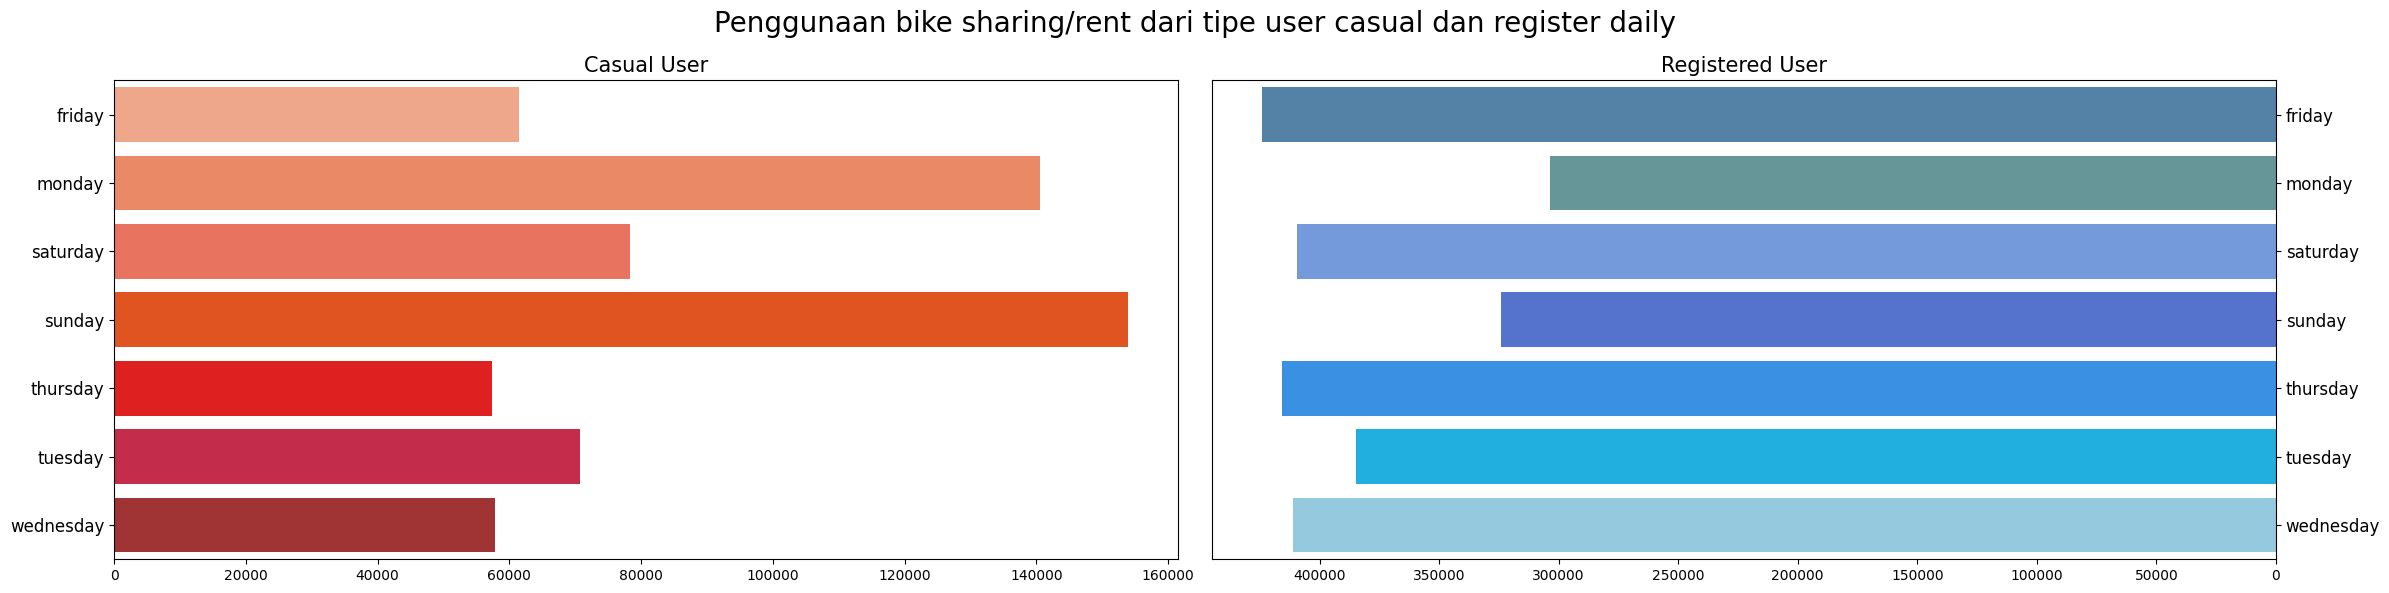

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Colors definition
colors_casual = ["#FFA07A", "#FF7F50", "#FF6347", "#FF4500", "#FF0000", "#DC143C", "#B22222"]
colors_registered = ["#4682B4", "#5F9EA0", "#6495ED", "#4169E1", "#1E90FF", "#00BFFF", "#87CEEB"]

# Plot for Casual Users
sns.barplot(x="casual_user", y="day", data=sum_casual_user, palette=colors_casual, hue="day", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Casual User", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# Plot for Registered Users
sns.barplot(x="registered_user", y="day", data=sum_registered_user, hue="day", legend=False, palette=colors_registered, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Registered User", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

# Global title
plt.suptitle("Penggunaan bike sharing/rent dari tipe user casual dan register daily", fontsize=20)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


untuk casual user penggunaan bike sharing/rent paling banyak di hari minggu, dan paling sedikit di hari kamis

sedangkan untuk register user penggunaan bike sharing/rent paling banyak di hari jumat, dan paling sedikit di hari senin

### Pertanyaan 4:

Bagaimana pola penggunaan Bike sharing/rent berdasarkan musim dan cuaca ?

C:\Users\wicki\AppData\Local\Temp\ipykernel_23688\804869038.py:6: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.barplot(x="total_user", y="weather", data=byweather, palette=colors, hue="weather", legend=False, ax=ax[0])
C:\Users\wicki\AppData\Local\Temp\ipykernel_23688\804869038.py:18: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.barplot(x="total_user", y="season", data=byseason, hue="season", legend=False, palette=colors, ax=ax[1])


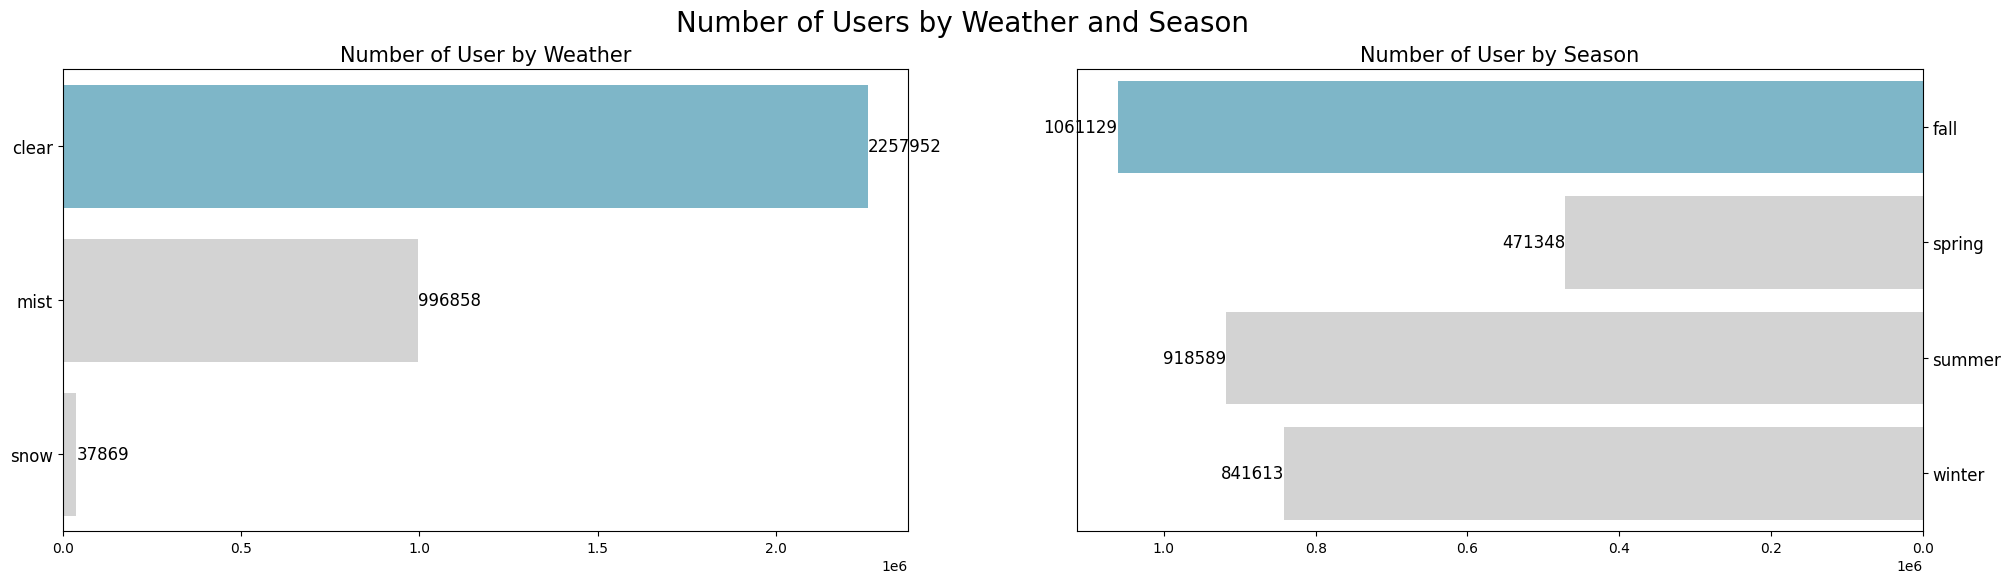

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Plot for Weather
sns.barplot(x="total_user", y="weather", data=byweather, palette=colors, hue="weather", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Number of User by Weather", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# Add labels on Weather bars
for p in ax[0].patches:
    ax[0].text(p.get_width() + 100, p.get_y() + p.get_height() / 2,
               f'{int(p.get_width())}', ha='left', va='center', fontsize=12)

# Plot for Season
sns.barplot(x="total_user", y="season", data=byseason, hue="season", legend=False, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Number of User by Season", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

# Add labels on Season bars
for p in ax[1].patches:
    ax[1].text(p.get_width() - 100, p.get_y() + p.get_height() / 2,
               f'{int(p.get_width())}', ha='right', va='center', fontsize=12)

plt.suptitle("Number of Users by Weather and Season", fontsize=20)
plt.show()


**Insight:**

berdasarkan kondisi cuaca, penggunaan bike sharing paling banyak pada cuaca cerah, sedangkan paling rendah saat cuaca bersalju ataupun hujan deras.
Bila berdasarkan musim, penggunaan bike sharing paling banyak pada gugur (fall), sedangkan paling rendah pada musim semi

## Analisis Lanjutan (Opsional)

In [34]:
rfm_df = day.groupby(by="day", as_index=False).agg({
    "date": "max",         # Mendapatkan tanggal terakhir transaksi untuk setiap "day"
    "instant": "nunique",  # Menghitung jumlah transaksi unik (frekuensi)
    "total_user": "sum"    # Menjumlahkan total pendapatan untuk setiap "day"
})


rfm_df.columns = ["day", "max_order_timestamp", "frequency", "monetary"]
#max_order_timestamp: Tanggal terakhir transaksi.
#frequency: Frekuensi transaksi (jumlah pesanan).
#monetary: Total pendapatan.

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date #Tanggal terakhir transaksi.
#recent_date: Mengambil tanggal terbaru dari semua transaksi.
recent_date = day["date"].dt.date.max()

#recency: Dihitung sebagai selisih hari antara recent_date (hari terakhir transaksi dalam dataset) dan max_order_timestamp (tanggal transaksi terakhir). Ini menggambarkan berapa lama sejak transaksi terakhir.
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)#Kolom max_order_timestamp dihapus setelah informasi recency dihitung karena sudah tidak diperlukan lagi.
rfm_df

C:\Users\wicki\AppData\Local\Temp\ipykernel_23688\687818292.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_df = day.groupby(by="day", as_index=False).agg({


,day,frequency,monetary,recency
0,friday,104,485395,4
1,monday,105,444027,1
2,saturday,104,487790,3
3,sunday,105,477807,2
4,thursday,104,473048,5
5,tuesday,105,455503,0
6,wednesday,104,469109,6


Proses analisis RFM untuk segmentasi pelanggan dan promosi peningkatan revenue sbb:

Recency: Mengukur seberapa baru transaksi dilakukan.

Frequency: Mengukur seberapa sering transaksi terjadi.

Monetary: Mengukur nilai total transaksi.


C:\Users\wicki\AppData\Local\Temp\ipykernel_23688\3809847128.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="monetary", y="day", data=rfm_df.sort_values(by="monetary", ascending=False),


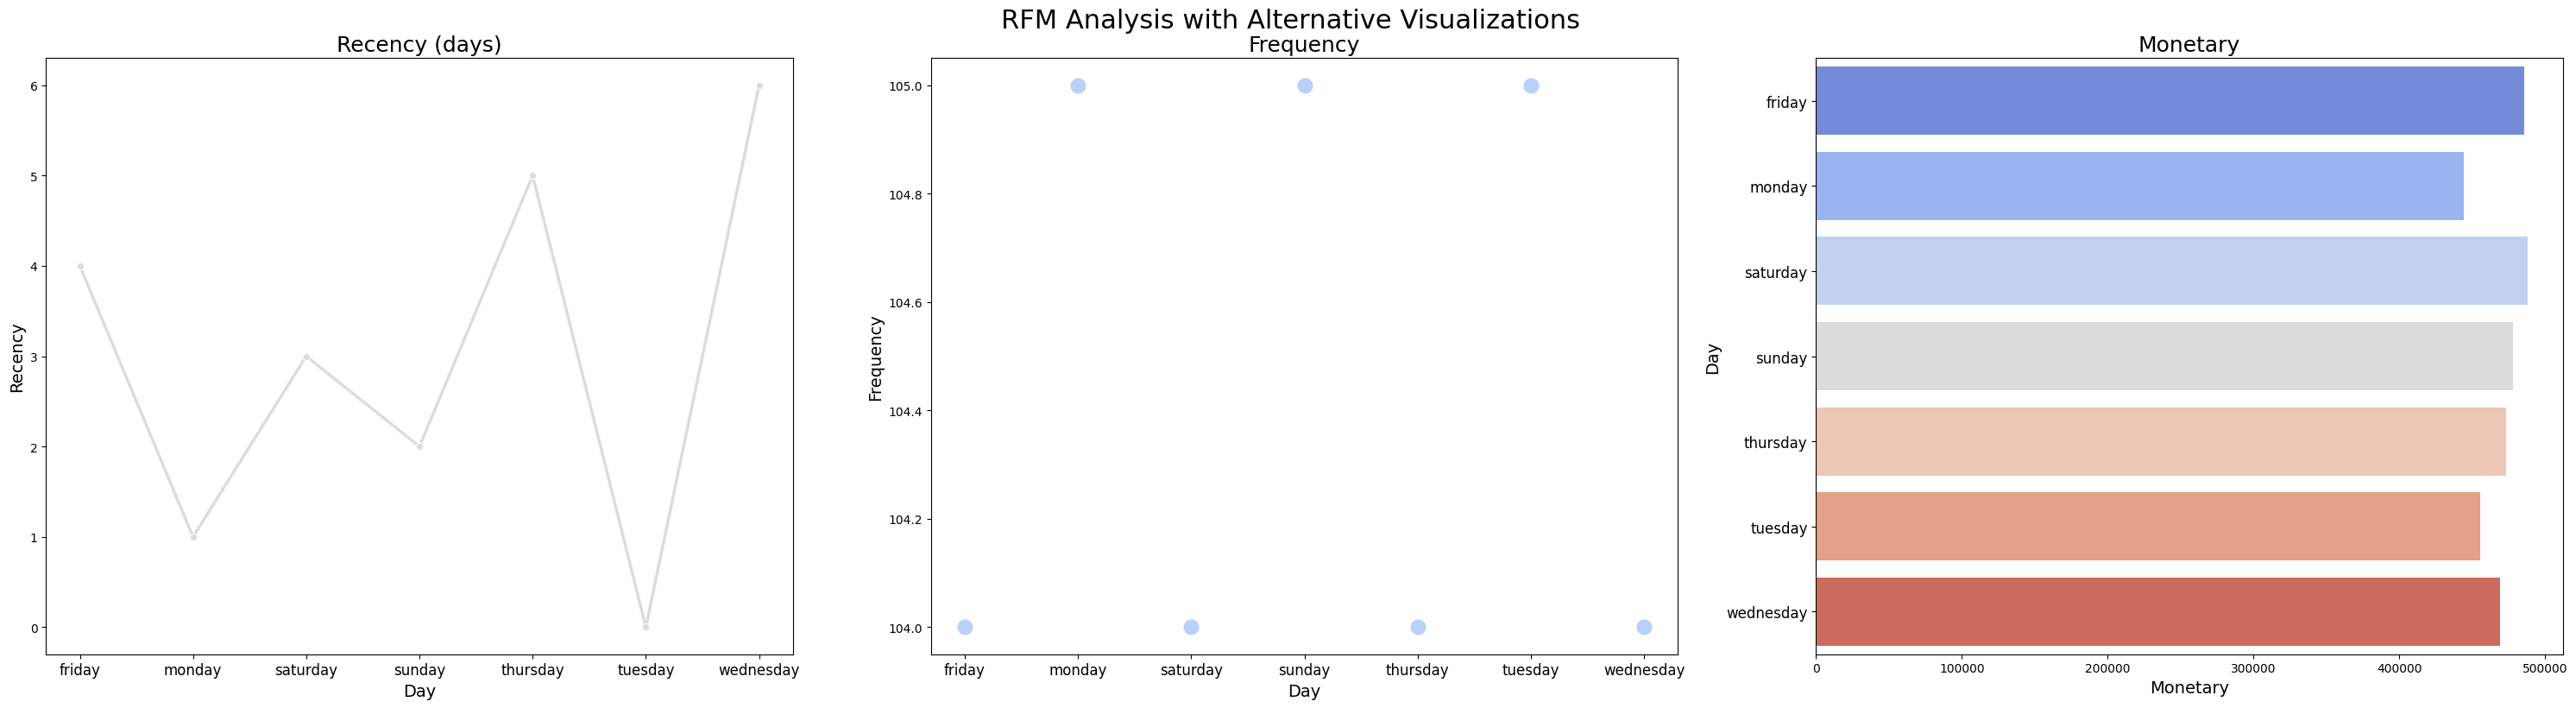

In [37]:
# Visualizing
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 8))
colors = sns.color_palette("coolwarm", 7)

# Lineplot for Recency
sns.lineplot(y="recency", x="day", data=rfm_df.sort_values(by="recency", ascending=True),
             marker="o", linewidth=2.5, color=colors[3], ax=ax[0])
ax[0].set_title("Recency (days)", fontsize=18)
ax[0].set_xlabel("Day", fontsize=14)
ax[0].set_ylabel("Recency", fontsize=14)
ax[0].tick_params(axis='x', labelsize=12)

# Scatterplot for Frequency
sns.scatterplot(y="frequency", x="day", data=rfm_df.sort_values(by="frequency", ascending=False),
                s=200, color=colors[2], ax=ax[1])
ax[1].set_title("Frequency", fontsize=18)
ax[1].set_xlabel("Day", fontsize=14)
ax[1].set_ylabel("Frequency", fontsize=14)
ax[1].tick_params(axis='x', labelsize=12)

# Horizontal barplot for Monetary
sns.barplot(x="monetary", y="day", data=rfm_df.sort_values(by="monetary", ascending=False),
            palette="coolwarm", ax=ax[2])
ax[2].set_title("Monetary", fontsize=18)
ax[2].set_xlabel("Monetary", fontsize=14)
ax[2].set_ylabel("Day", fontsize=14)
ax[2].tick_params(axis='y', labelsize=12)

# Adjust layout and display the visualization
plt.tight_layout()
plt.suptitle("RFM Analysis with Alternative Visualizations", fontsize=22, y=1.02)
plt.show()

**Insight**

Langkah Strategis Berdasarkan Insight dari chart RFM:

1. Recency (Grafik Kiri)
Hari dengan recency terendah (pelanggan paling baru) adalah Selasa (Tuesday).
Strategi: Fokus pada retensi pelanggan pada hari Selasa, karena pelanggan di hari ini baru saja melakukan transaksi dan masih aktif.
2. Frequency (Grafik Tengah)
Semua hari (Senin, Minggu, Selasa, Jumat, Sabtu) memiliki nilai frequency yang sama tinggi.
Strategi: Tidak ada prioritas khusus berdasarkan frequency, tetapi ini menunjukkan pelanggan sering bertransaksi sepanjang hari-hari ini.
3. Monetary (Grafik Kanan)
Hari dengan monetary tertinggi adalah Sabtu (Saturday) dan Jumat (Friday).
Strategi: Fokus pada hari Sabtu dan Jumat untuk meningkatkan pendapatan dengan strategi upselling dan cross-selling.

*Kesimpulan*

- Hari utama: Jumat karena memenuhi kriteria monetary

- Hari pendukung: Sabtu untuk pendapatan tinggi, dan Selasa untuk retensi pelanggan baru.

## Conclusion

**- Conclusion pertanyaan 1**

tren penggunaan bike sharing tahun 2012 naik dibanding 2011

**- Conclusion pertanyaan 2**

penggunaan bike sharing dimulai dari bulan february dengan puncaknya di bulan agustus (saat weekday/working day) dan june&Sept (saat weekend/holiday) dan akan turun kembali menjelang desember (musim dingin)

**- Conclusion pertanyaan 3**

untuk casual user penggunaan bike sharing/rent paling banyak di hari minggu, dan paling sedikit di hari rabu

sedangkan untuk register user penggunaan bike sharing/rent paling banyak di hari jumat, dan paling sedikit di hari senin

**- Conclusion pertanyaan 4**

berdasarkan kondisi cuaca, penggunaan bike sharing paling banyak pada cuaca cerah, sedangkan paling rendah saat cuaca hujan deras.
Bila berdasarkan musim, penggunaan bike sharing paling banyak pada gugur (fall), sedangkan paling rendah pada musim semi

**- Conclusion strategi berdasarkan analysis RFM**

berikut rekomendasi untuk peningkatan revenue dari tahun ke tahun yang dihasilkan dari analysis RFM :

-Hari Jumat: Lakukan kampanye loyalitas dan promosi khusus untuk memaksimalkan frekuensi serta nilai pembelian pelanggan. Optimalkan potensi pelanggan yang sudah melakukan transaksi baru-baru ini.

-Hari Sabtu: Tingkatkan volume penjualan dengan strategi cross-selling dan bundling.

-Hari Selasa: Fokuskan strategi retensi seperti pemberian insentif atau pesan pengingat kepada pelanggan aktif.